# Online Retail Data Analysis: Initial Processing and Statistics

This notebook focuses on three main aspects:
1. Initial Data Loading and Overview
2. Data Cleaning and Preprocessing
3. Comprehensive Statistical Analysis

The analysis will provide a solid foundation for understanding the dataset's characteristics and preparing it for further analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

# Set plotting style
sns.set_palette('husl')

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 100)

Matplotlib is building the font cache; this may take a moment.


## 1. Initial Data Loading and Overview

Let's load the dataset and examine its basic properties, including:
- Data shape and structure
- Column information and data types
- Missing values
- Duplicate entries
- Basic summary statistics

In [2]:
# Load the dataset
df = pd.read_csv('../data/online_retail.csv')

# Display basic information
print('Dataset Shape:', df.shape)
print('\nDataset Info:')
df.info()

print('\nFirst few rows:')
display(df.head())

print('\nMissing Values:')
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
display(missing_info)

print('\nDuplicate Rows:', df.duplicated().sum())

Dataset Shape: (541909, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB

First few rows:


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550,17850.000,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750,17850.000,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390,17850.000,United Kingdom



Missing Values:


,Missing Values,Percentage
index,0,0.000
InvoiceNo,0,0.000
StockCode,0,0.000
Description,1454,0.268
Quantity,0,0.000
InvoiceDate,0,0.000
UnitPrice,0,0.000
CustomerID,135080,24.927
Country,0,0.000



Duplicate Rows: 0


In [5]:
# Initial data quality checks
print('Value Ranges:')
print('\nQuantity range:', df['Quantity'].min(), 'to', df['Quantity'].max())
print('UnitPrice range:', df['UnitPrice'].min(), 'to', df['UnitPrice'].max())

print('\nUnique Values per Column:')
for column in df.columns:
    print(f'{column}: {df[column].nunique()} unique values')

# Check for any potential data anomalies
print('\nPotential Anomalies:')
print('Negative quantities:', (df['Quantity'] < 0).sum())
print('Zero or negative prices:', (df['UnitPrice'] <= 0).sum())
print('Blank descriptions:', (df['Description'].str.strip() == '').sum())

Value Ranges:

Quantity range: -80995 to 80995
UnitPrice range: -11062.06 to 38970.0

Unique Values per Column:
index: 541909 unique values
InvoiceNo: 25900 unique values
StockCode: 4070 unique values
Description: 4223 unique values
Quantity: 722 unique values
InvoiceDate: 23260 unique values
UnitPrice: 1630 unique values
CustomerID: 4372 unique values
Country: 38 unique values

Potential Anomalies:
Negative quantities: 10624
Zero or negative prices: 2517
Blank descriptions: 0


## 2. Data Cleaning and Preprocessing

Based on the initial analysis, we'll perform the following cleaning steps:
1. Handle missing values
2. Remove duplicates
3. Fix data types
4. Handle anomalies
5. Create derived features

In [6]:
# Create a copy for cleaning
df_cleaned = df.copy()

# Convert InvoiceDate to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Remove invalid transactions
df_cleaned = df_cleaned[
    (df_cleaned['Quantity'] > 0) & 
    (df_cleaned['UnitPrice'] > 0) & 
    (df_cleaned['Description'].str.strip() != '')
]

# Create derived features
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

print('Shape after cleaning:', df_cleaned.shape)
print('\nMissing values after cleaning:')
display(df_cleaned.isnull().sum())

Shape after cleaning: (397884, 15)

Missing values after cleaning:


index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
Year           0
Month          0
Day            0
DayOfWeek      0
Hour           0
dtype: int64

In [7]:
# Verify the cleaning results
print('Data Quality After Cleaning:')
print('\nQuantity range:', df_cleaned['Quantity'].min(), 'to', df_cleaned['Quantity'].max())
print('UnitPrice range:', df_cleaned['UnitPrice'].min(), 'to', df_cleaned['UnitPrice'].max())
print('TotalAmount range:', df_cleaned['TotalAmount'].min(), 'to', df_cleaned['TotalAmount'].max())

# Display sample of cleaned data
print('\nSample of cleaned data:')
display(df_cleaned.sample(5))

Data Quality After Cleaning:

Quantity range: 1 to 80995
UnitPrice range: 0.001 to 8142.75
TotalAmount range: 0.001 to 168469.6

Sample of cleaned data:


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,DayOfWeek,Hour
413622,413622,572317,22306,SILVER MUG BONE CHINA TREE OF LIFE,1,2011-10-23 16:13:00,1.060,14629.000,United Kingdom,1.060,2011,10,23,6,16
228160,228160,556917,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-06-15 13:37:00,1.040,12415.000,Australia,99.840,2011,6,15,2,13
237760,237760,557885,21156,RETROSPOT CHILDRENS APRON,8,2011-06-23 13:37:00,1.950,12465.000,Belgium,15.600,2011,6,23,3,13
375325,375325,569459,23168,CLASSIC CAFE SUGAR DISPENSER,12,2011-10-04 11:33:00,1.250,16713.000,United Kingdom,15.000,2011,10,4,1,11
117928,117928,546414,22443,GROW YOUR OWN HERBS SET OF 3,2,2011-03-13 10:25:00,7.950,16768.000,United Kingdom,15.900,2011,3,13,6,10


## 3. Comprehensive Statistical Analysis

We'll perform a detailed statistical analysis including:
- Basic statistics (mean, median, std, etc.)
- Distribution analysis
- Correlation analysis
- Outlier detection

In [8]:
# Basic statistics for numerical columns
numeric_cols = ['Quantity', 'UnitPrice', 'TotalAmount']
print('Basic Statistics:')
display(df_cleaned[numeric_cols].describe())

# Advanced statistics
stats_df = pd.DataFrame({
    'skew': df_cleaned[numeric_cols].skew(),
    'kurtosis': df_cleaned[numeric_cols].kurtosis(),
    'IQR': df_cleaned[numeric_cols].quantile(0.75) - df_cleaned[numeric_cols].quantile(0.25),
    'coefficient_of_variation': df_cleaned[numeric_cols].std() / df_cleaned[numeric_cols].mean()
})

print('\nAdvanced Statistics:')
display(stats_df)

Basic Statistics:


,Quantity,UnitPrice,TotalAmount
count,397884.000,397884.000,397884.000
mean,12.988,3.116,22.397
std,179.332,22.098,309.071
min,1.000,0.001,0.001
25%,2.000,1.250,4.680
50%,6.000,1.950,11.800
75%,12.000,3.750,19.800
max,80995.000,8142.750,168469.600



Advanced Statistics:


,skew,kurtosis,IQR,coefficient_of_variation
Quantity,409.893,178186.243,10.000,13.807
UnitPrice,204.033,58140.397,2.500,7.091
TotalAmount,451.443,232155.117,15.120,13.800


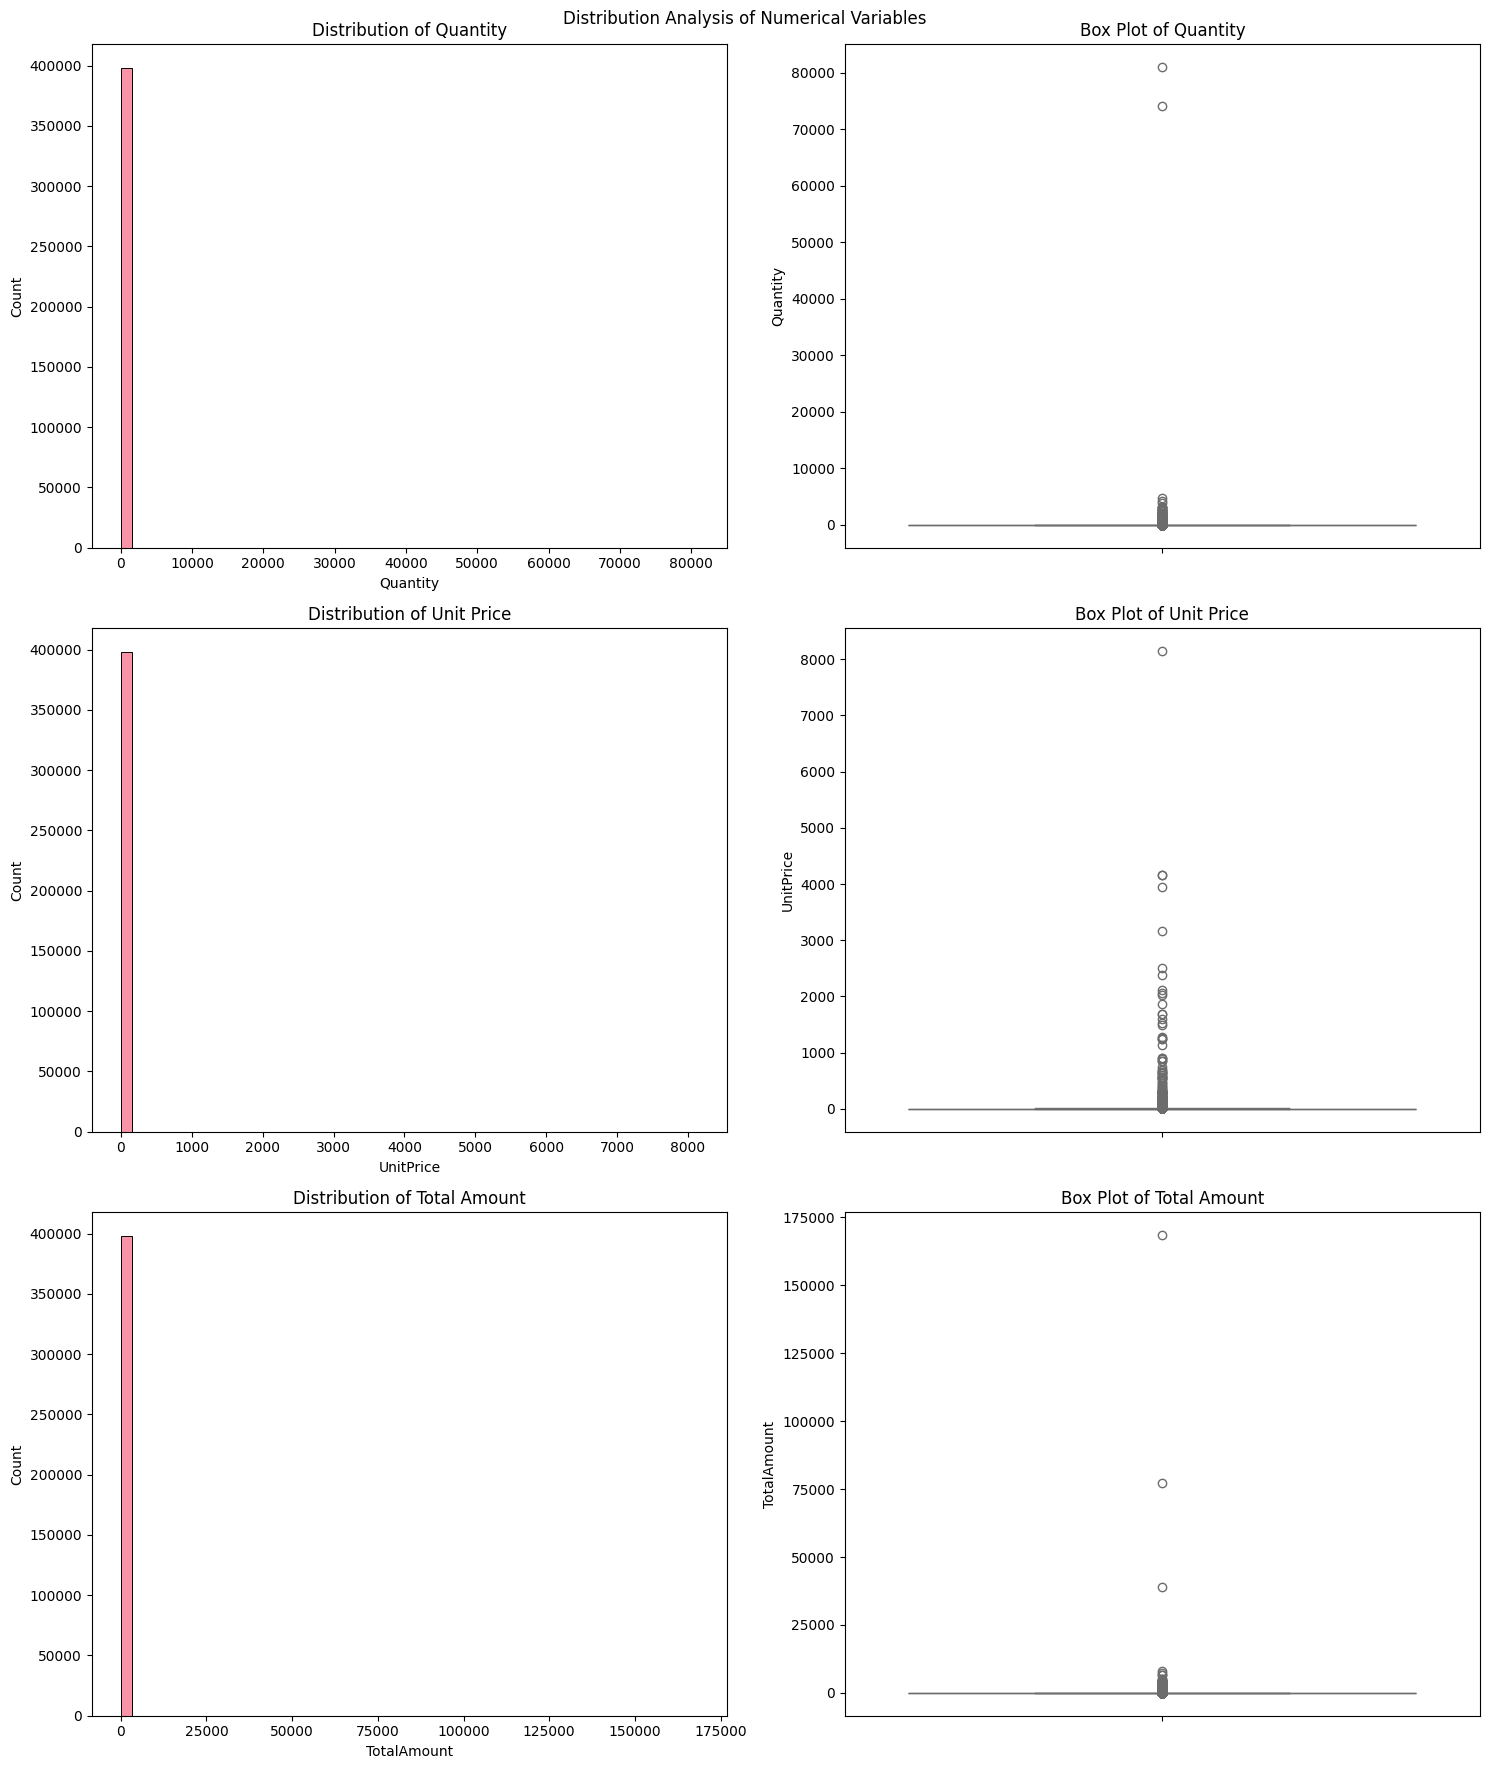

In [9]:
# Distribution plots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribution Analysis of Numerical Variables')

# Histogram and Box plot for Quantity
sns.histplot(data=df_cleaned, x='Quantity', bins=50, ax=axes[0,0])
axes[0,0].set_title('Distribution of Quantity')
sns.boxplot(data=df_cleaned, y='Quantity', ax=axes[0,1])
axes[0,1].set_title('Box Plot of Quantity')

# Histogram and Box plot for UnitPrice
sns.histplot(data=df_cleaned, x='UnitPrice', bins=50, ax=axes[1,0])
axes[1,0].set_title('Distribution of Unit Price')
sns.boxplot(data=df_cleaned, y='UnitPrice', ax=axes[1,1])
axes[1,1].set_title('Box Plot of Unit Price')

# Histogram and Box plot for TotalAmount
sns.histplot(data=df_cleaned, x='TotalAmount', bins=50, ax=axes[2,0])
axes[2,0].set_title('Distribution of Total Amount')
sns.boxplot(data=df_cleaned, y='TotalAmount', ax=axes[2,1])
axes[2,1].set_title('Box Plot of Total Amount')

plt.tight_layout()
plt.show()

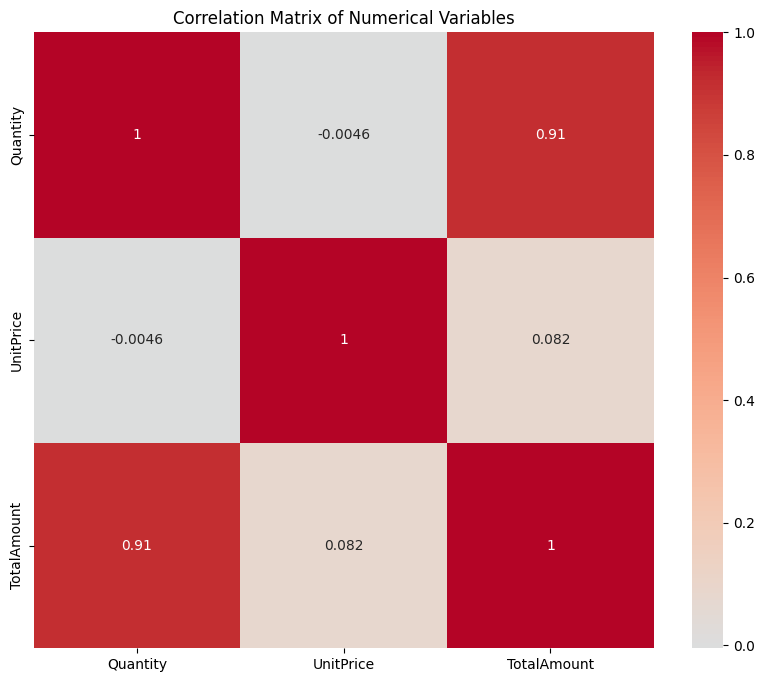


Spearman Correlation Matrix:


,Quantity,UnitPrice,TotalAmount
Quantity,1.000,-0.408,0.657
UnitPrice,-0.408,1.000,0.349
TotalAmount,0.657,0.349,1.000


In [10]:
# Correlation analysis
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Calculate and display Spearman correlation (for non-linear relationships)
spearman_corr = df_cleaned[numeric_cols].corr(method='spearman')
print('\nSpearman Correlation Matrix:')
display(spearman_corr)

In [11]:
# Outlier detection using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print('Outlier Analysis:')
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers(df_cleaned, col)
    print(f'\n{col}:')
    print(f'Number of outliers: {n_outliers}')
    print(f'Percentage of outliers: {(n_outliers/len(df_cleaned)*100):.2f}%')
    print(f'Bounds: [{lower:.2f}, {upper:.2f}]')

Outlier Analysis:

Quantity:
Number of outliers: 25647
Percentage of outliers: 6.45%
Bounds: [-13.00, 27.00]

UnitPrice:
Number of outliers: 34356
Percentage of outliers: 8.63%
Bounds: [-2.50, 7.50]

TotalAmount:
Number of outliers: 31241
Percentage of outliers: 7.85%
Bounds: [-18.00, 42.48]


## 4. Save Processed Data

In [12]:
# Save the cleaned dataset
df_cleaned.to_csv('../data/processed_retail_data.csv', index=False)
print('Processed data has been saved successfully!')

Processed data has been saved successfully!


## 4. Customer Analysis

We'll analyze customer behavior patterns including:
- Purchase frequency
- Customer value
- Purchase patterns
- Customer segmentation

Customer Statistics:


,PurchaseFrequency,TotalSpent,TotalItems,AverageOrderValue
count,4338.000,4338.000,4338.000,4338.000
mean,91.721,2054.266,1191.289,68.351
std,228.785,8989.230,5046.082,1467.919
min,1.000,3.750,1.000,2.101
25%,17.000,307.415,160.000,12.365
50%,41.000,674.485,379.000,17.723
75%,100.000,1661.740,992.750,24.858
max,7847.000,280206.020,196915.000,77183.600


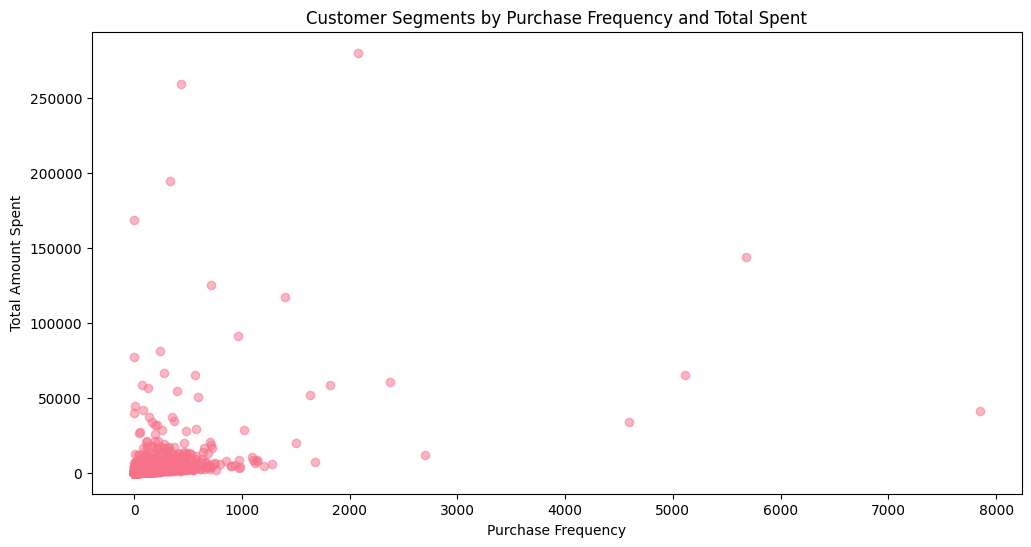

In [13]:
# Customer purchase patterns
customer_stats = df_cleaned.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'TotalAmount': 'sum',
    'Quantity': 'sum'
}).rename(columns={
    'InvoiceNo': 'PurchaseFrequency',
    'TotalAmount': 'TotalSpent',
    'Quantity': 'TotalItems'
})

# Add average order value
customer_stats['AverageOrderValue'] = customer_stats['TotalSpent'] / customer_stats['PurchaseFrequency']

print('Customer Statistics:')
display(customer_stats.describe())

# Visualize customer segments
plt.figure(figsize=(12, 6))
plt.scatter(customer_stats['PurchaseFrequency'], 
           customer_stats['TotalSpent'], 
           alpha=0.5)
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Amount Spent')
plt.title('Customer Segments by Purchase Frequency and Total Spent')
plt.show()

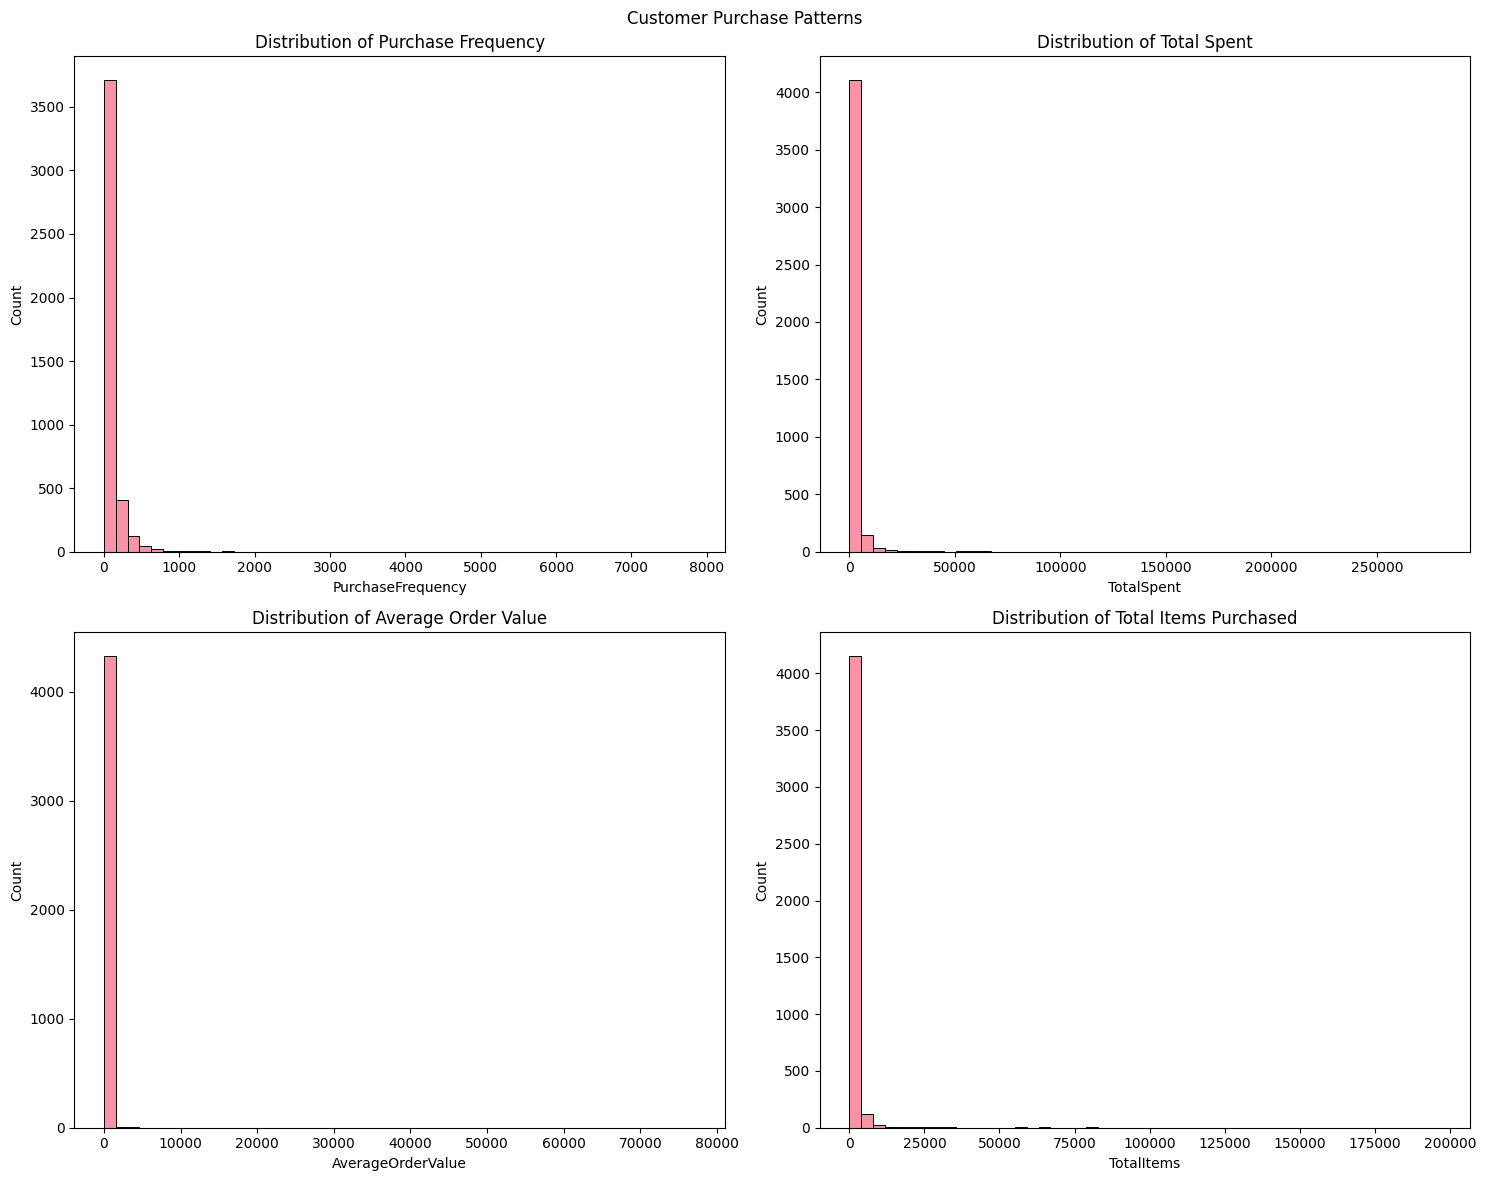

In [14]:
# Customer purchase distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Customer Purchase Patterns')

# Purchase frequency distribution
sns.histplot(data=customer_stats, x='PurchaseFrequency', bins=50, ax=axes[0,0])
axes[0,0].set_title('Distribution of Purchase Frequency')

# Total spent distribution
sns.histplot(data=customer_stats, x='TotalSpent', bins=50, ax=axes[0,1])
axes[0,1].set_title('Distribution of Total Spent')

# Average order value distribution
sns.histplot(data=customer_stats, x='AverageOrderValue', bins=50, ax=axes[1,0])
axes[1,0].set_title('Distribution of Average Order Value')

# Total items distribution
sns.histplot(data=customer_stats, x='TotalItems', bins=50, ax=axes[1,1])
axes[1,1].set_title('Distribution of Total Items Purchased')

plt.tight_layout()
plt.show()

## 5. Country Analysis

We'll analyze sales patterns across different countries including:
- Sales distribution
- Customer base
- Average order value by country

In [15]:
# Country-wise analysis
country_stats = df_cleaned.groupby('Country').agg({
    'InvoiceNo': 'count',
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    'InvoiceNo': 'NumberOfTransactions',
    'TotalAmount': 'TotalRevenue',
    'CustomerID': 'UniqueCustomers',
    'Quantity': 'TotalItems'
})

# Calculate average order value per country
country_stats['AverageOrderValue'] = country_stats['TotalRevenue'] / country_stats['NumberOfTransactions']

# Sort by revenue
country_stats_sorted = country_stats.sort_values('TotalRevenue', ascending=False)

# Display top 10 countries
print('Top 10 Countries by Revenue:')
display(country_stats_sorted.head(10))

Top 10 Countries by Revenue:


,NumberOfTransactions,TotalRevenue,UniqueCustomers,TotalItems,AverageOrderValue
Country,,,,,
United Kingdom,354321,7308391.554,3920,4256740,20.626
Netherlands,2359,285446.340,9,200361,121.003
EIRE,7236,265545.900,3,140275,36.698
Germany,9040,228867.140,94,119261,25.317
France,8341,209024.050,87,111471,25.060
Australia,1182,138521.310,9,83901,117.192
Spain,2484,61577.110,30,27940,24.789
Switzerland,1841,56443.950,21,30082,30.659
Belgium,2031,41196.340,25,23237,20.284


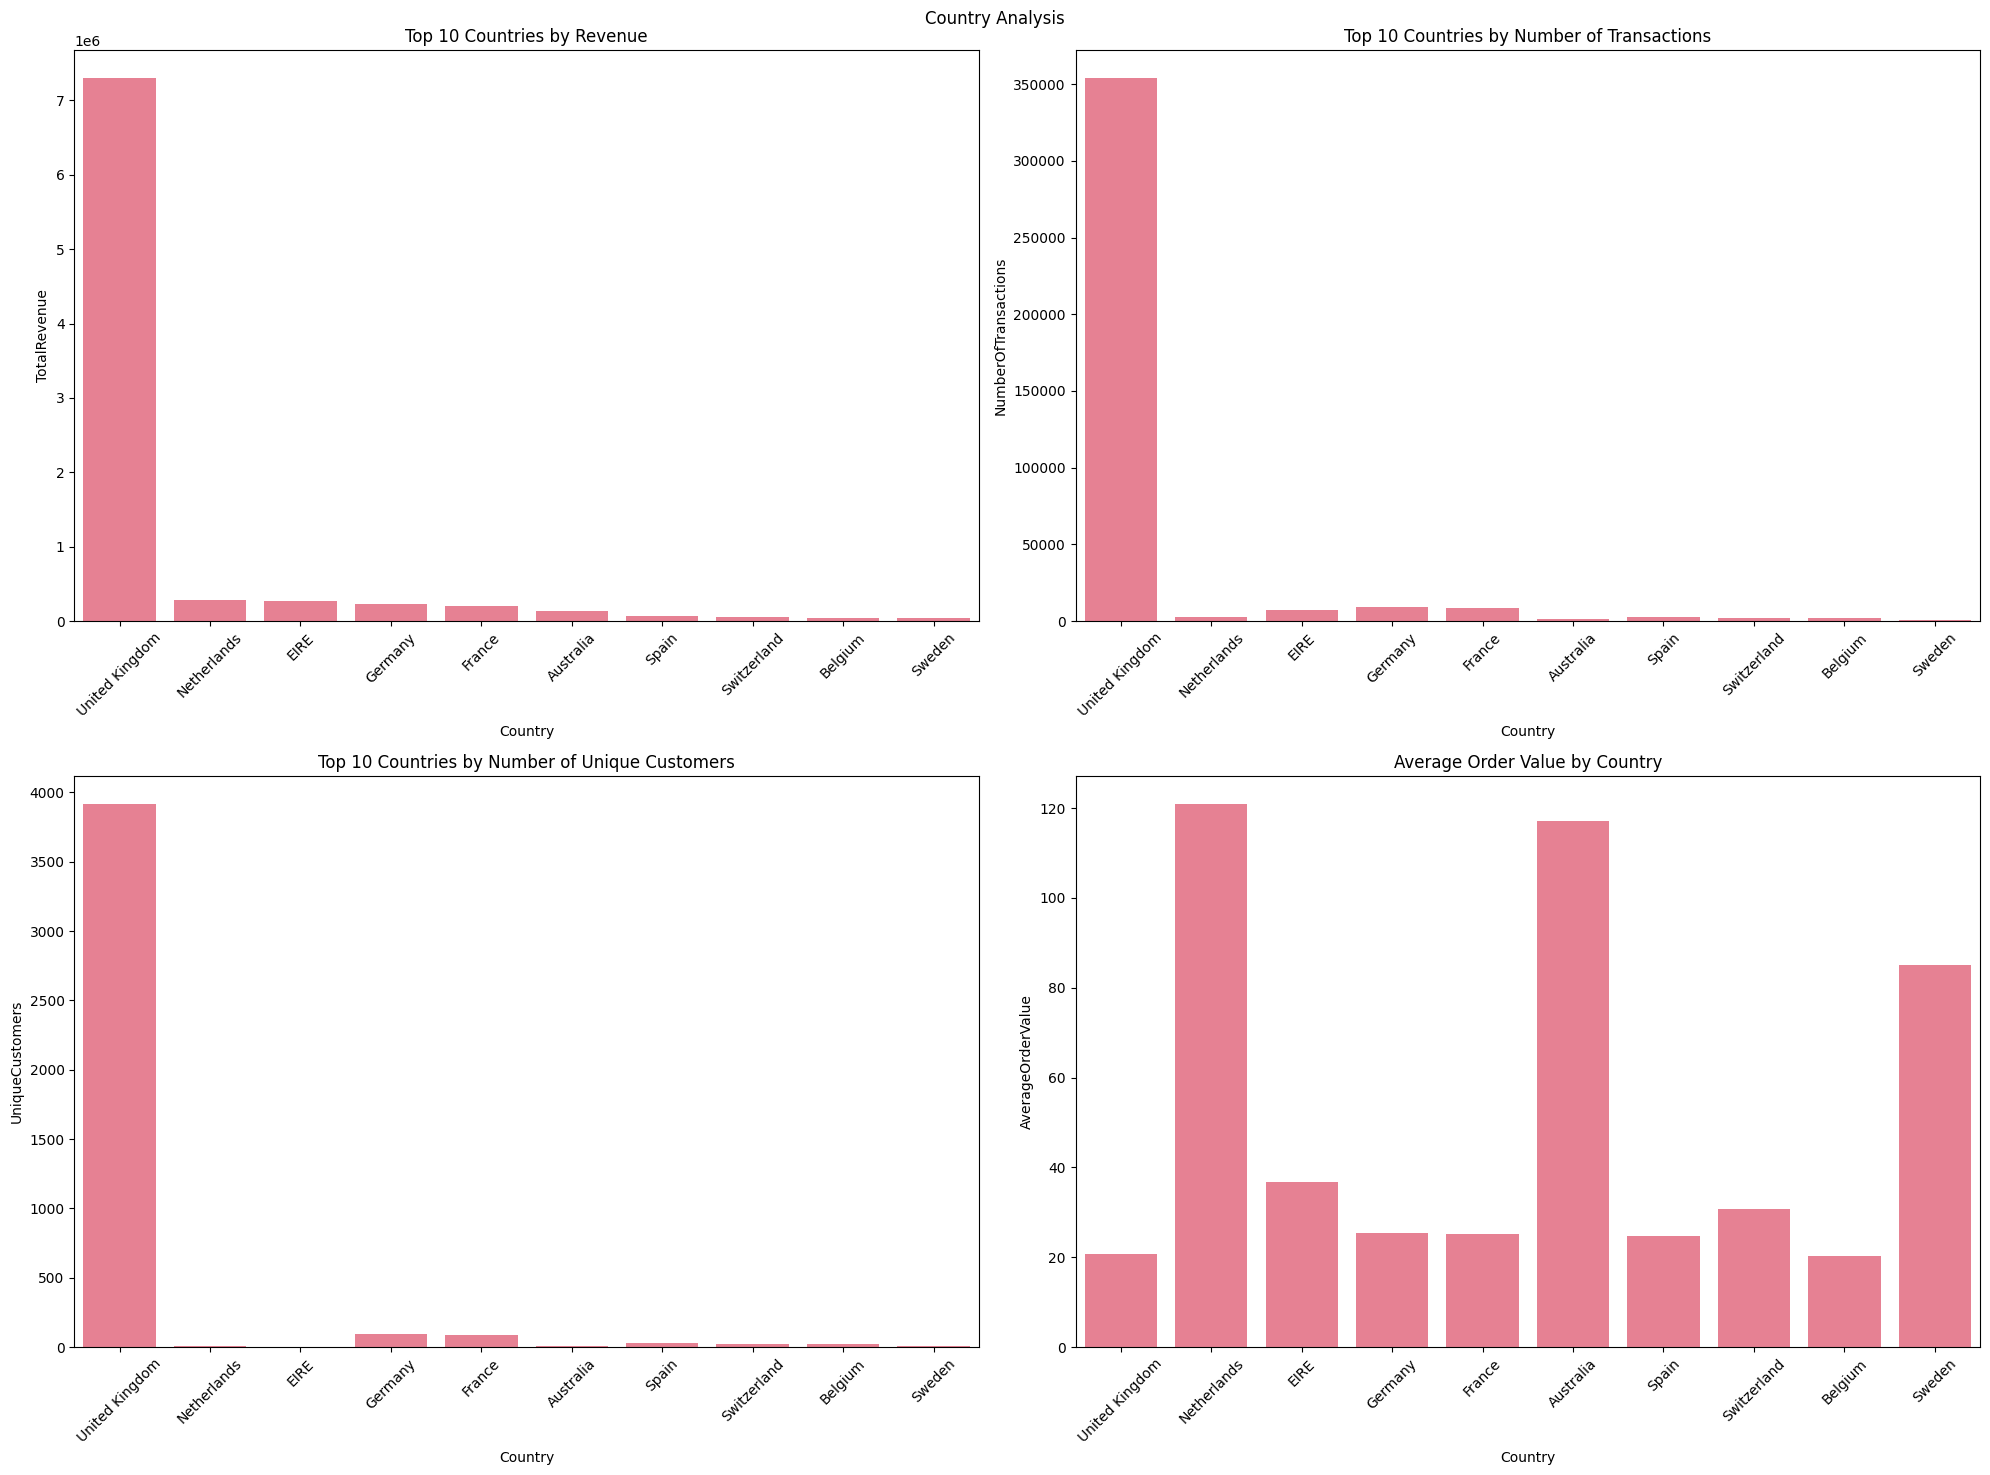

In [16]:
# Visualize country statistics
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Country Analysis')

# Top 10 countries by revenue
sns.barplot(data=country_stats_sorted.head(10).reset_index(), 
           x='Country', y='TotalRevenue', ax=axes[0,0])
axes[0,0].set_title('Top 10 Countries by Revenue')
axes[0,0].tick_params(axis='x', rotation=45)

# Top 10 countries by number of transactions
sns.barplot(data=country_stats_sorted.head(10).reset_index(), 
           x='Country', y='NumberOfTransactions', ax=axes[0,1])
axes[0,1].set_title('Top 10 Countries by Number of Transactions')
axes[0,1].tick_params(axis='x', rotation=45)

# Top 10 countries by unique customers
sns.barplot(data=country_stats_sorted.head(10).reset_index(), 
           x='Country', y='UniqueCustomers', ax=axes[1,0])
axes[1,0].set_title('Top 10 Countries by Number of Unique Customers')
axes[1,0].tick_params(axis='x', rotation=45)

# Average order value by country
sns.barplot(data=country_stats_sorted.head(10).reset_index(), 
           x='Country', y='AverageOrderValue', ax=axes[1,1])
axes[1,1].set_title('Average Order Value by Country')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Stock Code Analysis

We'll analyze product performance by stock code including:
- Top selling products
- Revenue by product
- Product frequency analysis

In [17]:
# Stock code analysis
stock_stats = df_cleaned.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'count',
    'CustomerID': 'nunique'
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'TotalAmount': 'TotalRevenue',
    'InvoiceNo': 'NumberOfTransactions',
    'CustomerID': 'UniqueCustomers'
})

# Calculate average price per unit
stock_stats['AveragePricePerUnit'] = stock_stats['TotalRevenue'] / stock_stats['TotalQuantity']

# Sort by revenue
stock_stats_sorted = stock_stats.sort_values('TotalRevenue', ascending=False)

print('Top 10 Products by Revenue:')
display(stock_stats_sorted.head(10))

Top 10 Products by Revenue:


,,TotalQuantity,TotalRevenue,NumberOfTransactions,UniqueCustomers,AveragePricePerUnit
StockCode,Description,,,,,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,1,1,2.080
22423,REGENCY CAKESTAND 3 TIER,12402,142592.950,1723,881,11.498
85123A,WHITE HANGING HEART T-LIGHT HOLDER,36725,100448.150,2028,856,2.735
85099B,JUMBO BAG RED RETROSPOT,46181,85220.780,1618,635,1.845
23166,MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.730,198,138,1.045
POST,POSTAGE,3120,77803.960,1099,331,24.937
47566,PARTY BUNTING,15291,68844.330,1396,708,4.502
84879,ASSORTED COLOUR BIRD ORNAMENT,35362,56580.340,1408,678,1.600
M,Manual,7173,53779.930,284,197,7.498


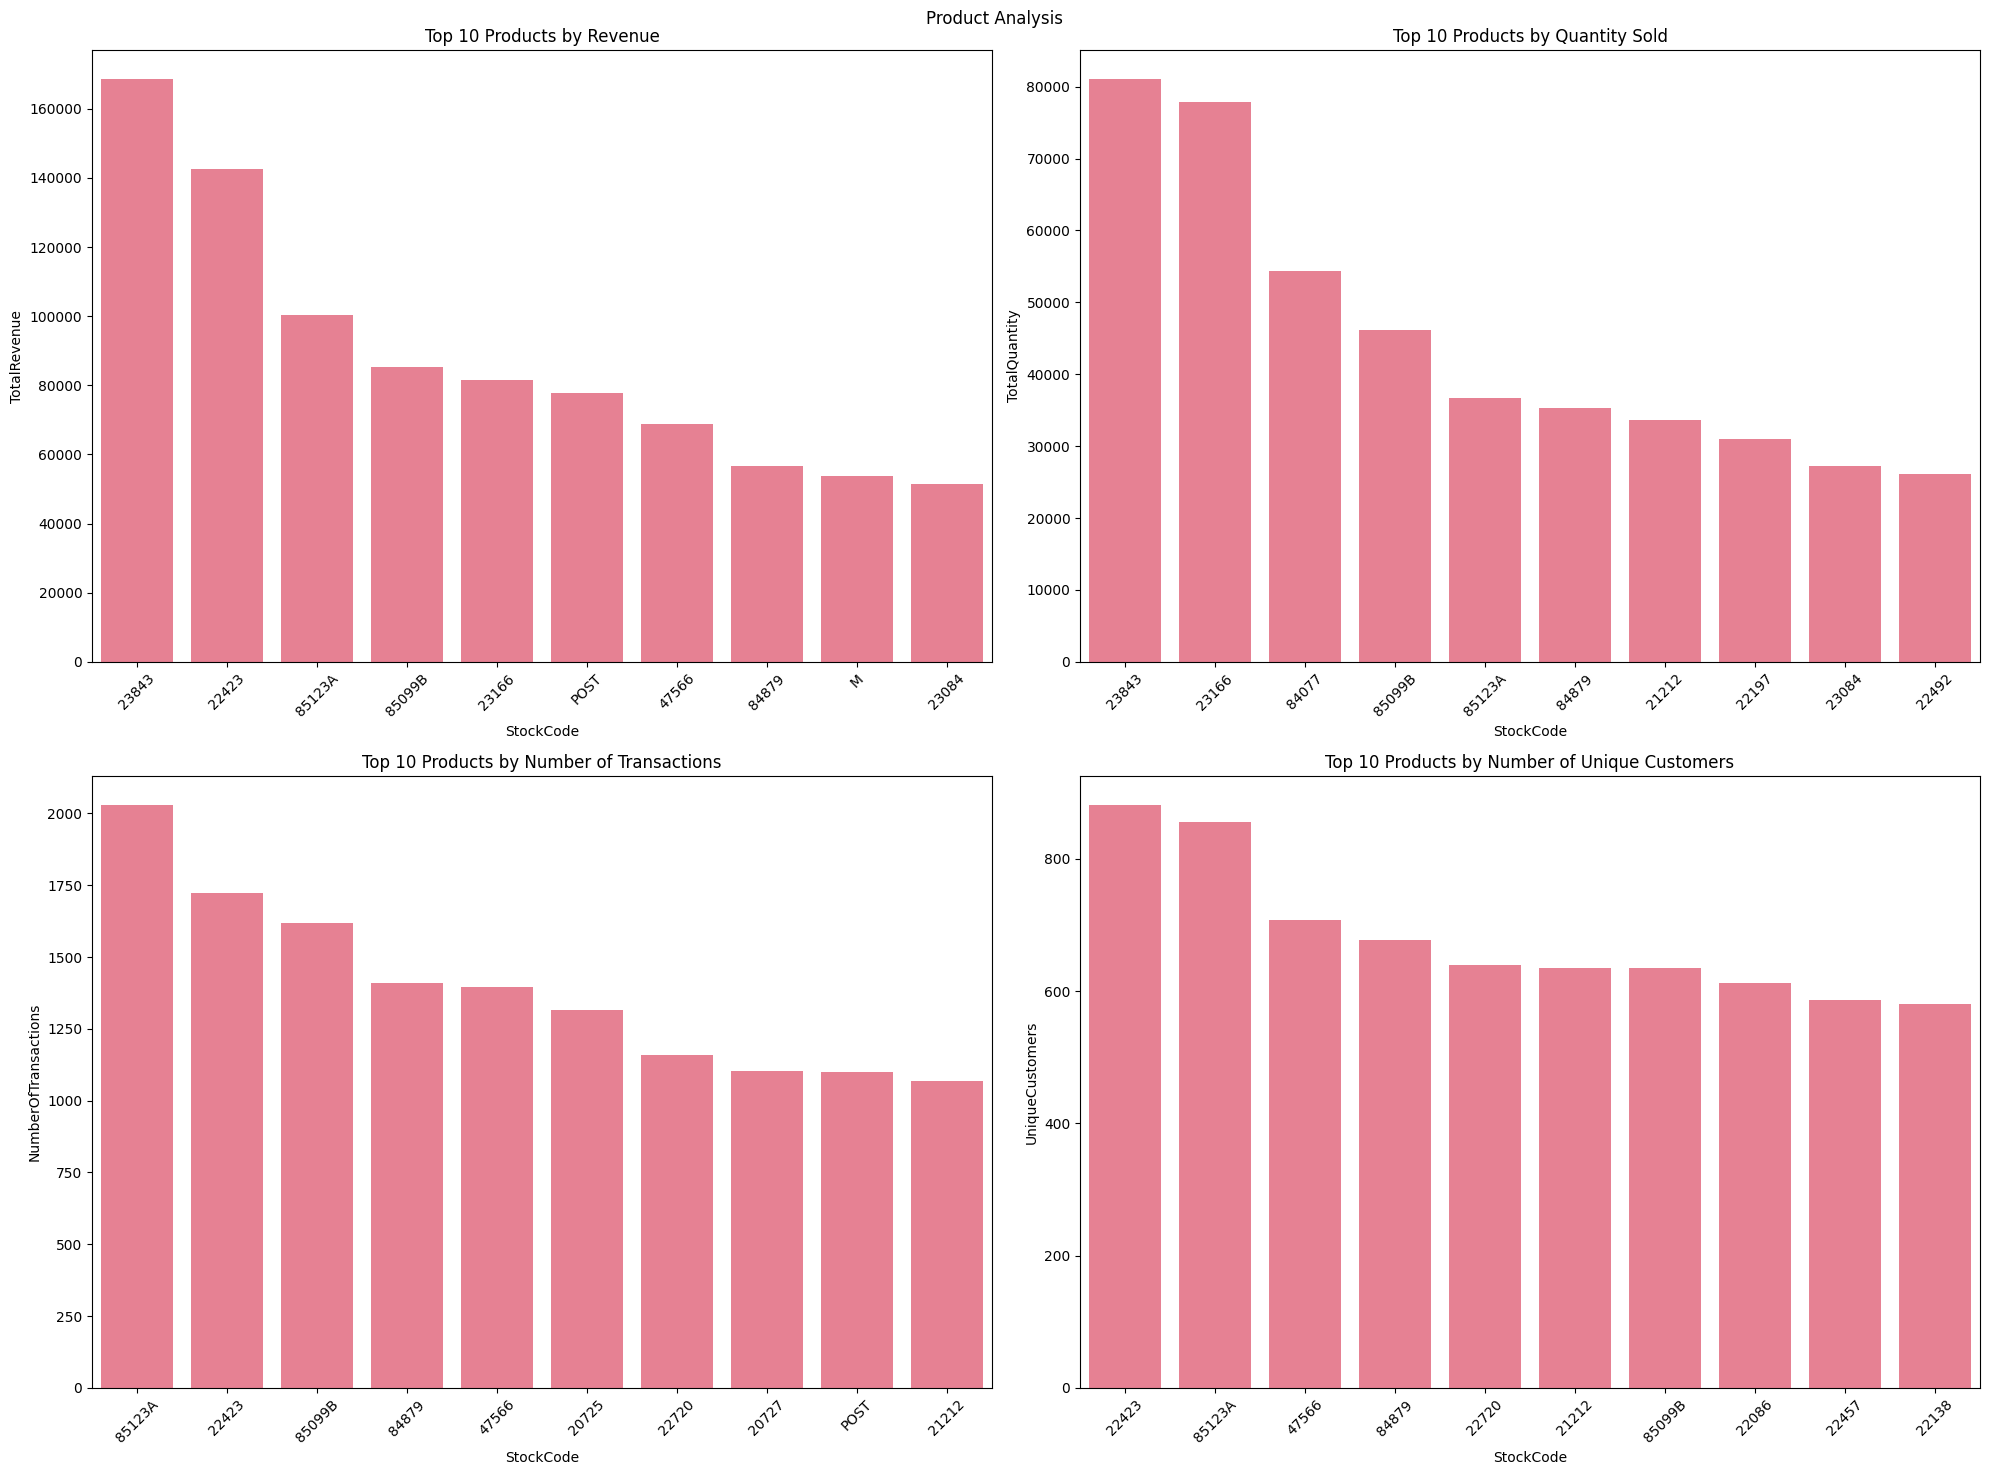

In [18]:
# Visualize product statistics
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Product Analysis')

# Top 10 products by revenue
top_10_revenue = stock_stats_sorted.head(10).reset_index()
sns.barplot(data=top_10_revenue, x='StockCode', y='TotalRevenue', ax=axes[0,0])
axes[0,0].set_title('Top 10 Products by Revenue')
axes[0,0].tick_params(axis='x', rotation=45)

# Top 10 products by quantity sold
top_10_quantity = stock_stats.sort_values('TotalQuantity', ascending=False).head(10).reset_index()
sns.barplot(data=top_10_quantity, x='StockCode', y='TotalQuantity', ax=axes[0,1])
axes[0,1].set_title('Top 10 Products by Quantity Sold')
axes[0,1].tick_params(axis='x', rotation=45)

# Top 10 products by number of transactions
top_10_transactions = stock_stats.sort_values('NumberOfTransactions', ascending=False).head(10).reset_index()
sns.barplot(data=top_10_transactions, x='StockCode', y='NumberOfTransactions', ax=axes[1,0])
axes[1,0].set_title('Top 10 Products by Number of Transactions')
axes[1,0].tick_params(axis='x', rotation=45)

# Top 10 products by unique customers
top_10_customers = stock_stats.sort_values('UniqueCustomers', ascending=False).head(10).reset_index()
sns.barplot(data=top_10_customers, x='StockCode', y='UniqueCustomers', ax=axes[1,1])
axes[1,1].set_title('Top 10 Products by Number of Unique Customers')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Description Analysis

We'll analyze products by their descriptions including:
- Popular product categories
- Word frequency analysis
- Product performance by description

In [19]:
# Description analysis
description_stats = df_cleaned.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'count',
    'CustomerID': 'nunique'
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'TotalAmount': 'TotalRevenue',
    'InvoiceNo': 'NumberOfTransactions',
    'CustomerID': 'UniqueCustomers'
})

# Sort by revenue
description_stats_sorted = description_stats.sort_values('TotalRevenue', ascending=False)

print('Top 10 Products by Description (Revenue):')
display(description_stats_sorted.head(10))

Top 10 Products by Description (Revenue):


,TotalQuantity,TotalRevenue,NumberOfTransactions,UniqueCustomers
Description,,,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,1,1
REGENCY CAKESTAND 3 TIER,12402,142592.950,1723,881
WHITE HANGING HEART T-LIGHT HOLDER,36725,100448.150,2028,856
JUMBO BAG RED RETROSPOT,46181,85220.780,1618,635
MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.730,198,138
POSTAGE,3120,77803.960,1099,331
PARTY BUNTING,15291,68844.330,1396,708
ASSORTED COLOUR BIRD ORNAMENT,35362,56580.340,1408,678
Manual,7173,53779.930,284,197


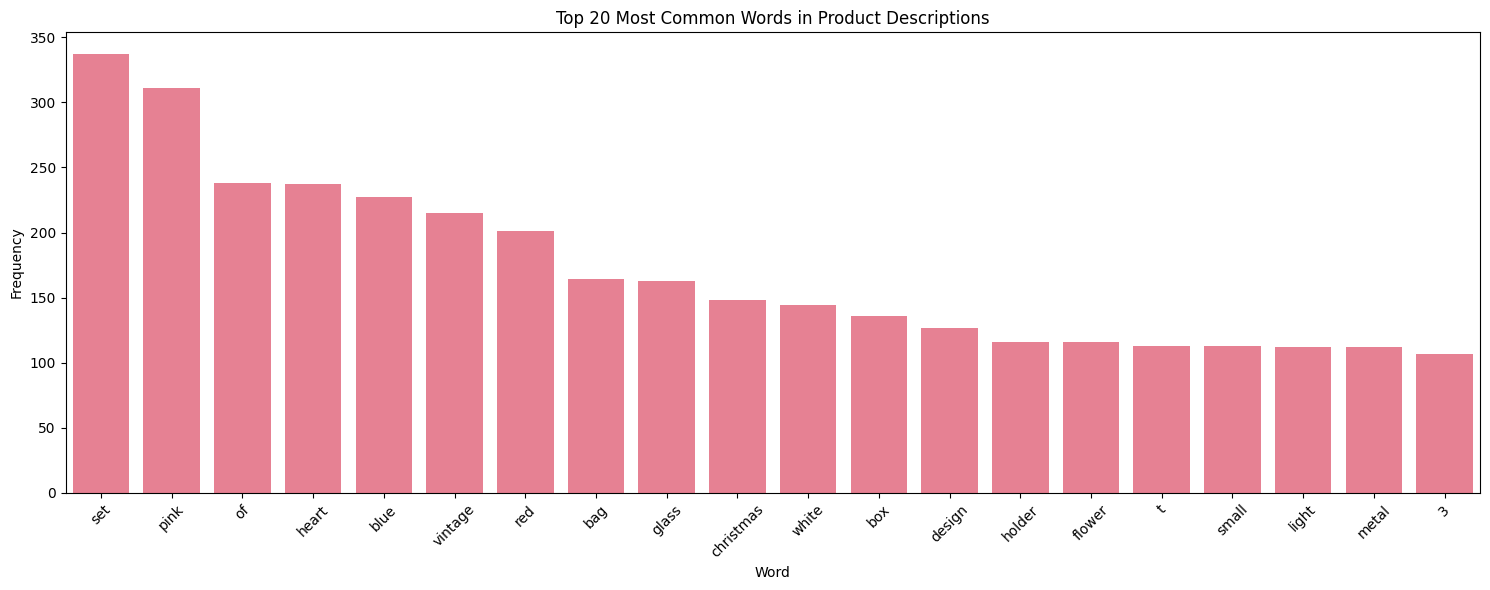

In [20]:
# Word frequency in descriptions
from collections import Counter
import re

# Function to extract words from description
def get_words(text):
    return re.findall(r'\b\w+\b', text.lower())

# Get all words from descriptions
all_words = []
for desc in df_cleaned['Description'].unique():
    all_words.extend(get_words(desc))

# Count word frequency
word_freq = Counter(all_words)

# Plot top 20 most common words
plt.figure(figsize=(15, 6))
words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(data=words, x='Word', y='Frequency')
plt.title('Top 20 Most Common Words in Product Descriptions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Price Analysis

We'll analyze pricing patterns including:
- Price distribution
- Price ranges
- Price-volume relationship

In [21]:
# Create price ranges
df_cleaned['PriceRange'] = pd.qcut(df_cleaned['UnitPrice'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Analyze sales by price range
price_range_stats = df_cleaned.groupby('PriceRange').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'count',
    'CustomerID': 'nunique'
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'TotalAmount': 'TotalRevenue',
    'InvoiceNo': 'NumberOfTransactions',
    'CustomerID': 'UniqueCustomers'
})

print('Sales Statistics by Price Range:')
display(price_range_stats)

Sales Statistics by Price Range:


/var/folders/2k/n1kmf9ns0dx49077c14tclgr0000gn/T/ipykernel_22031/4180075863.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_stats = df_cleaned.groupby('PriceRange').agg({


,TotalQuantity,TotalRevenue,NumberOfTransactions,UniqueCustomers
PriceRange,,,,
Very Low,2023423,1031360.134,91554,3785
Low,1416012,1914961.150,100291,3957
Medium,730253,1428073.140,51887,3586
High,644130,1990485.980,76705,3909
Very High,353994,2546527.500,77447,3959


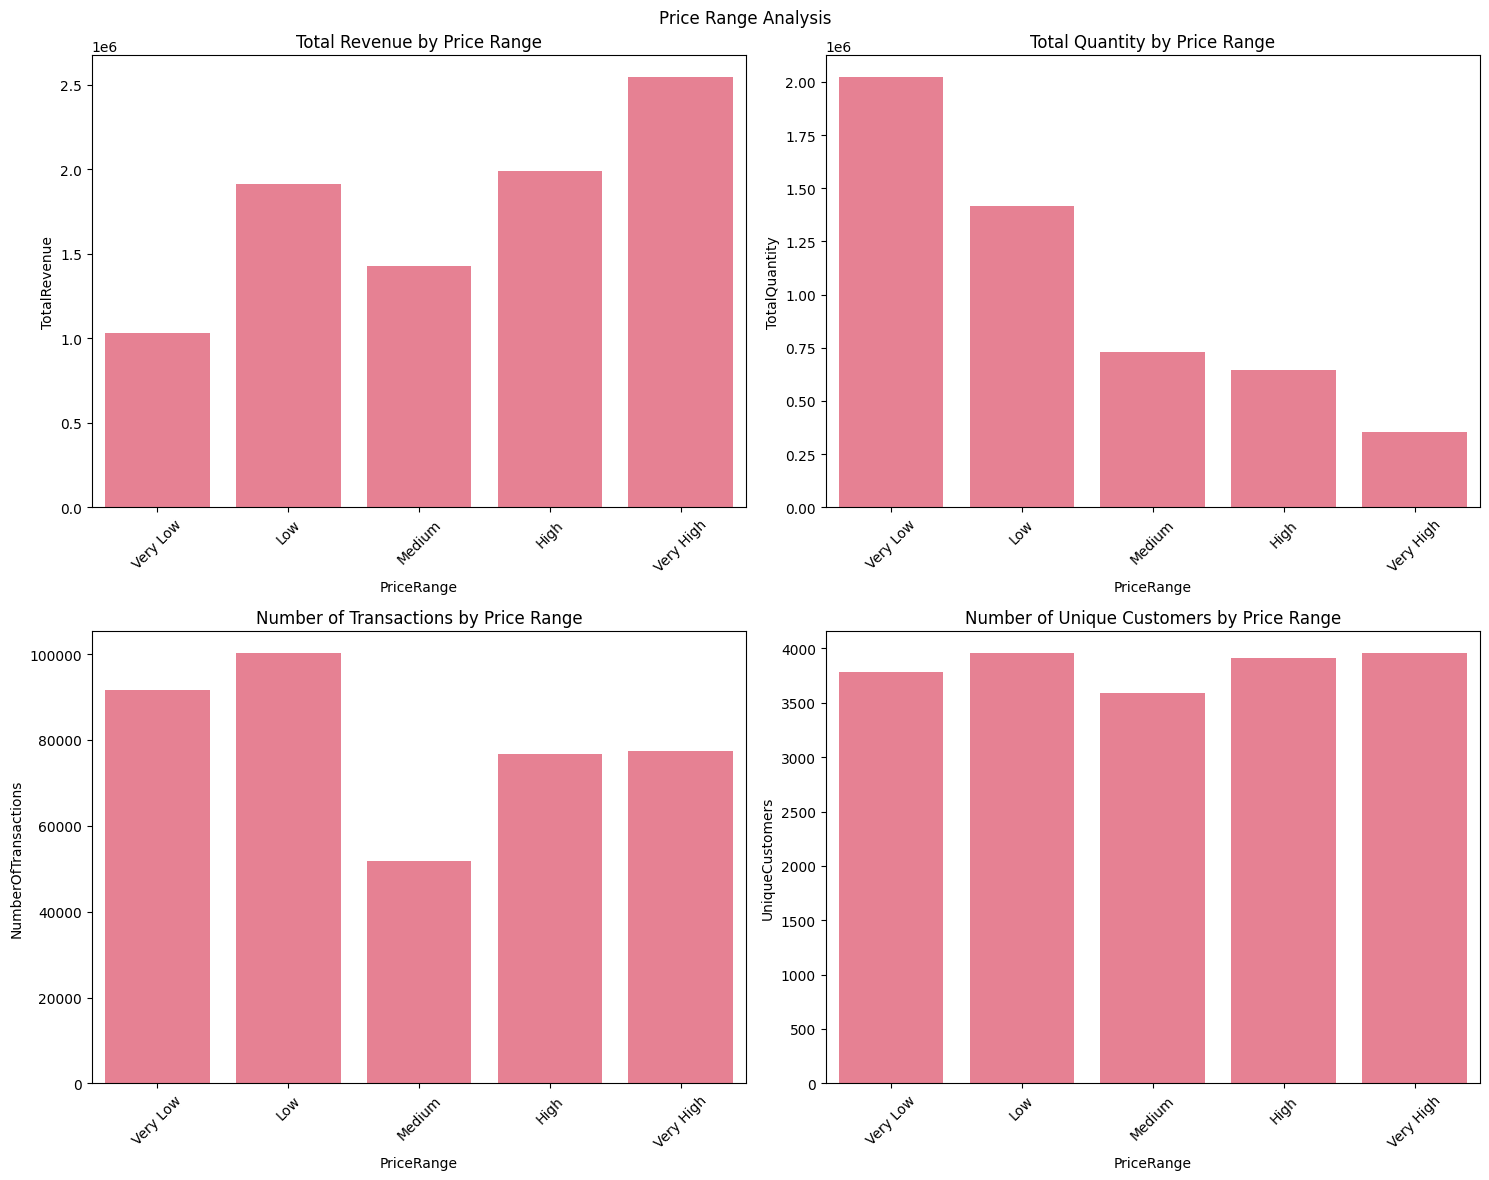

In [22]:
# Visualize price analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Price Range Analysis')

# Revenue by price range
sns.barplot(data=price_range_stats.reset_index(), 
           x='PriceRange', y='TotalRevenue', ax=axes[0,0])
axes[0,0].set_title('Total Revenue by Price Range')
axes[0,0].tick_params(axis='x', rotation=45)

# Quantity by price range
sns.barplot(data=price_range_stats.reset_index(), 
           x='PriceRange', y='TotalQuantity', ax=axes[0,1])
axes[0,1].set_title('Total Quantity by Price Range')
axes[0,1].tick_params(axis='x', rotation=45)

# Number of transactions by price range
sns.barplot(data=price_range_stats.reset_index(), 
           x='PriceRange', y='NumberOfTransactions', ax=axes[1,0])
axes[1,0].set_title('Number of Transactions by Price Range')
axes[1,0].tick_params(axis='x', rotation=45)

# Unique customers by price range
sns.barplot(data=price_range_stats.reset_index(), 
           x='PriceRange', y='UniqueCustomers', ax=axes[1,1])
axes[1,1].set_title('Number of Unique Customers by Price Range')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Save Processed Data

In [23]:
# Save the cleaned dataset and analysis results
df_cleaned.to_csv('../data/processed_retail_data.csv', index=False)
customer_stats.to_csv('../data/customer_analysis.csv')
country_stats.to_csv('../data/country_analysis.csv')
stock_stats.to_csv('../data/product_analysis.csv')
price_range_stats.to_csv('../data/price_analysis.csv')

print('All analysis results have been saved successfully!')

All analysis results have been saved successfully!


## 9. Time Series Analysis

We'll analyze temporal patterns in the data including:
- Daily sales trends
- Monthly patterns
- Seasonal decomposition
- Growth analysis

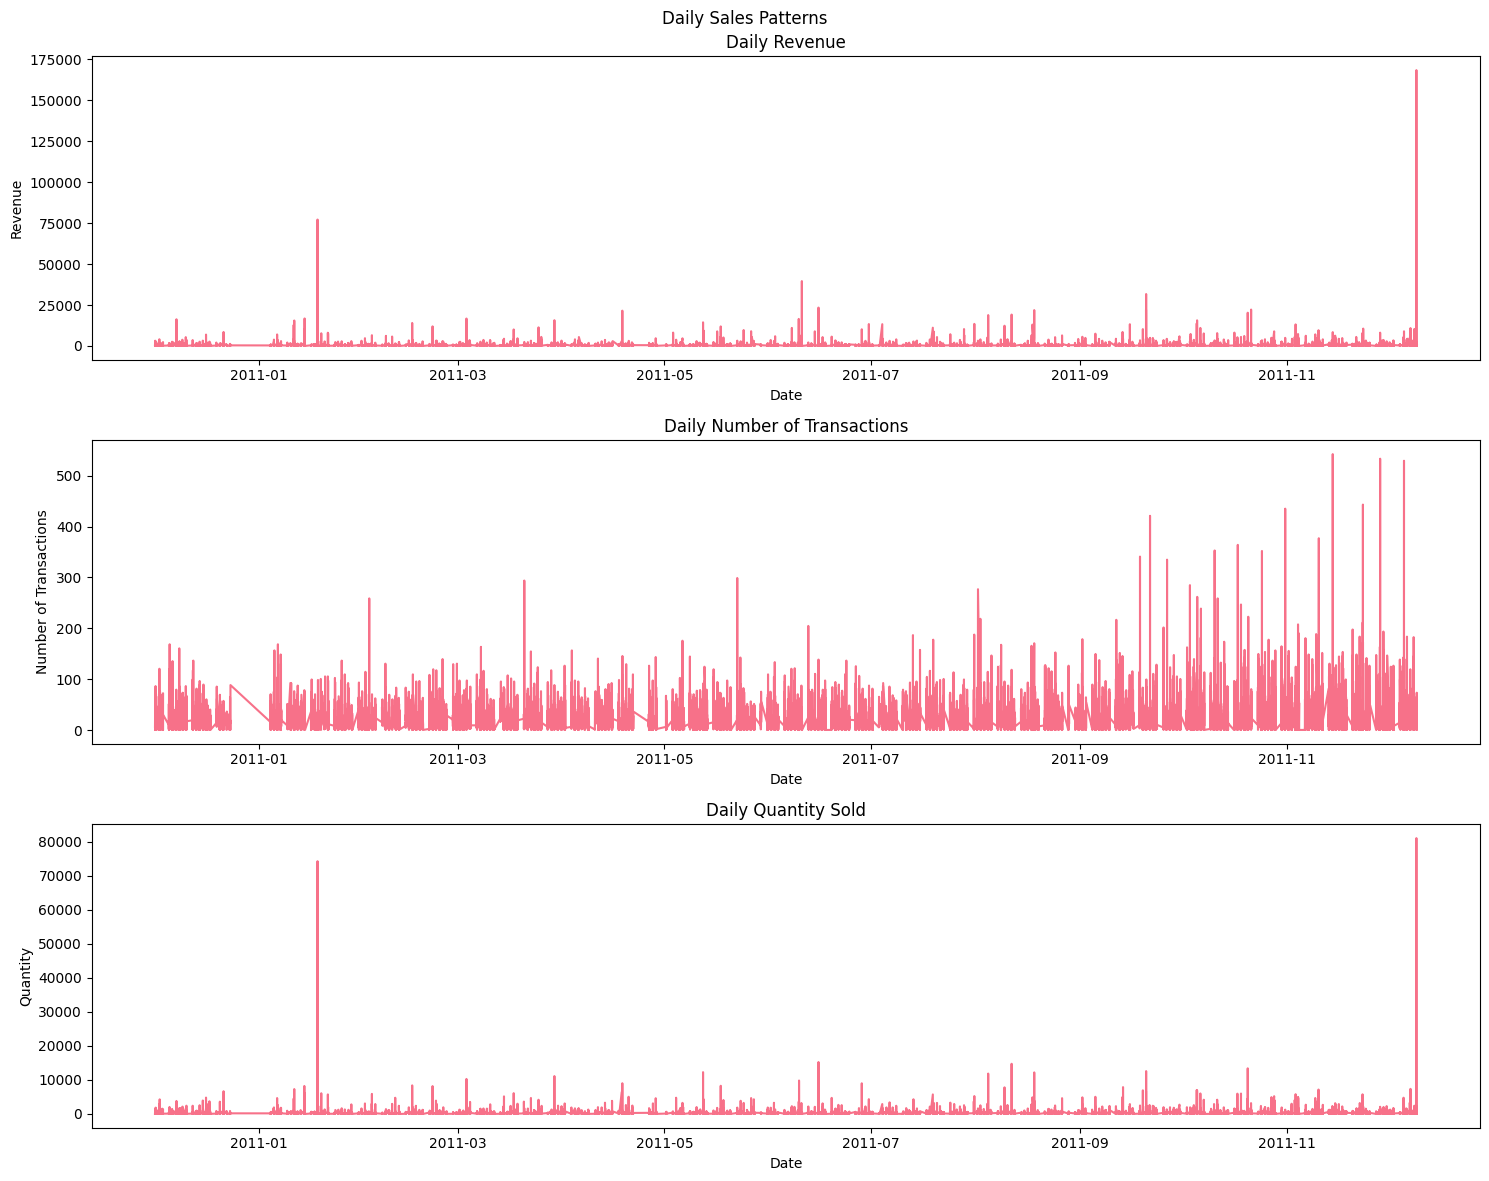

In [24]:
# Daily sales analysis
daily_sales = df_cleaned.groupby('InvoiceDate').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'count',
    'Quantity': 'sum'
}).reset_index()

# Plot daily sales
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Daily Sales Patterns')

# Revenue trend
axes[0].plot(daily_sales['InvoiceDate'], daily_sales['TotalAmount'])
axes[0].set_title('Daily Revenue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Revenue')

# Number of transactions
axes[1].plot(daily_sales['InvoiceDate'], daily_sales['InvoiceNo'])
axes[1].set_title('Daily Number of Transactions')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Transactions')

# Quantity sold
axes[2].plot(daily_sales['InvoiceDate'], daily_sales['Quantity'])
axes[2].set_title('Daily Quantity Sold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Quantity')

plt.tight_layout()
plt.show()

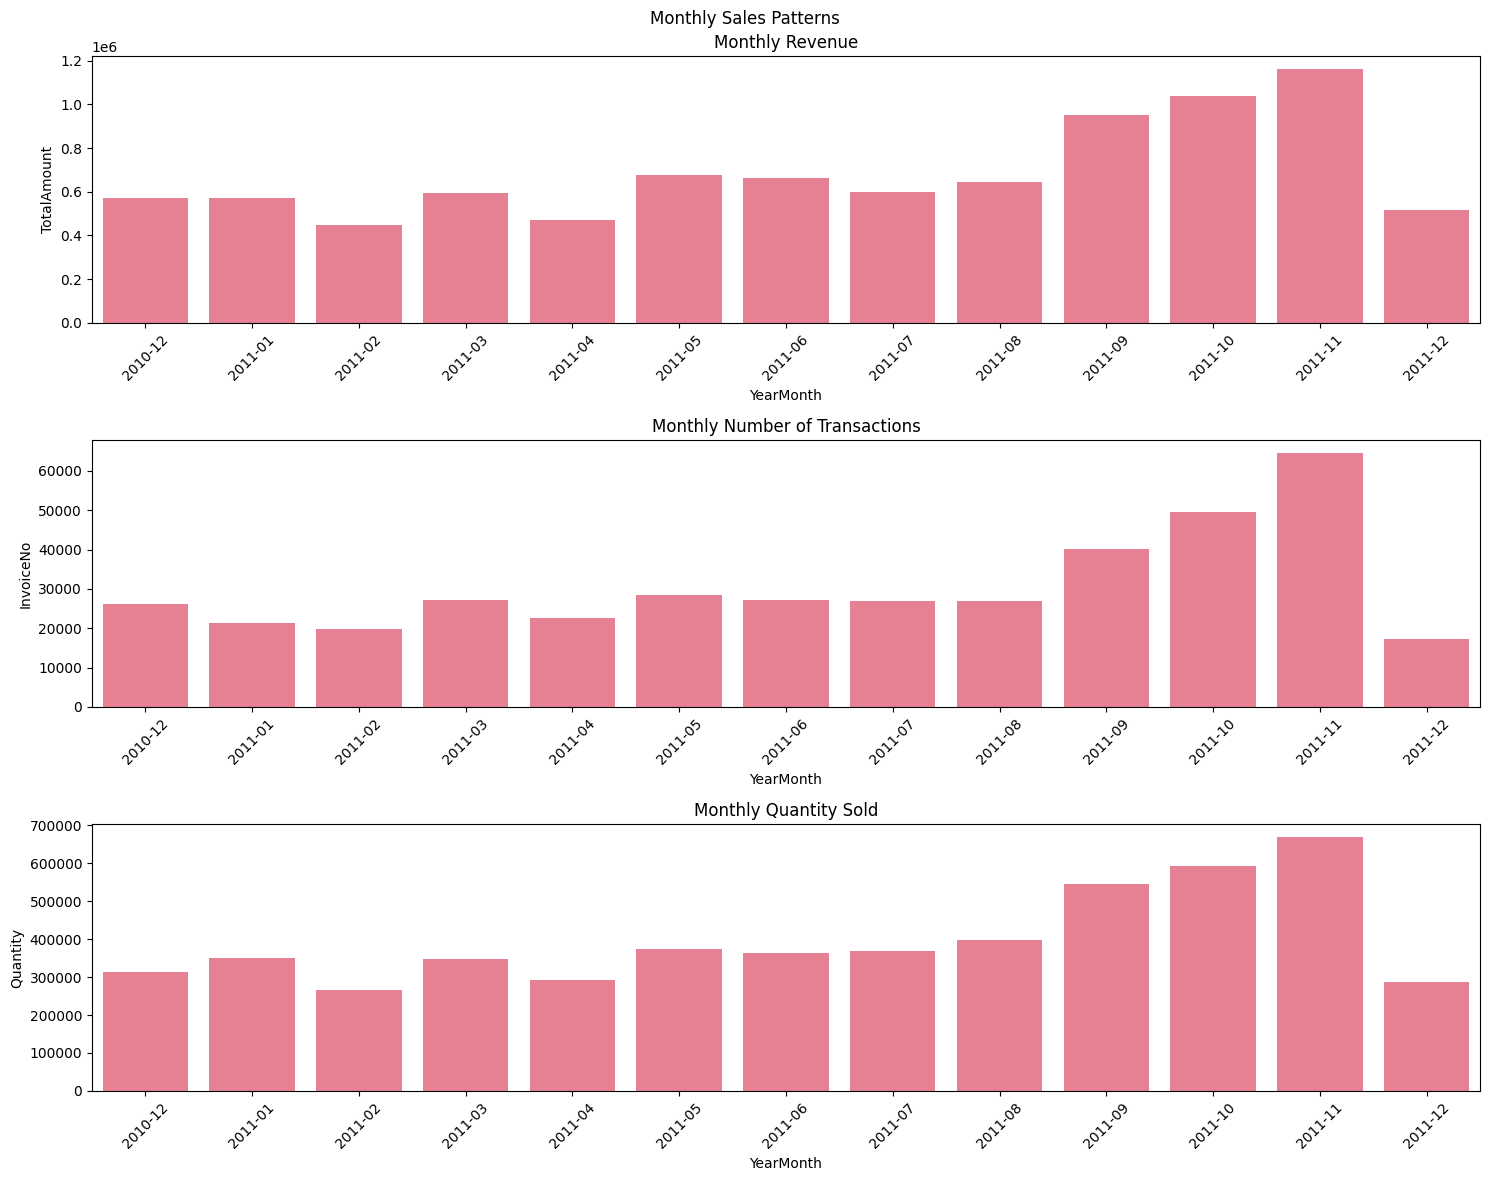

In [25]:
# Monthly analysis
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('YearMonth').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'count',
    'Quantity': 'sum'
}).reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot monthly patterns
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Monthly Sales Patterns')

sns.barplot(data=monthly_sales, x='YearMonth', y='TotalAmount', ax=axes[0])
axes[0].set_title('Monthly Revenue')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=monthly_sales, x='YearMonth', y='InvoiceNo', ax=axes[1])
axes[1].set_title('Monthly Number of Transactions')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=monthly_sales, x='YearMonth', y='Quantity', ax=axes[2])
axes[2].set_title('Monthly Quantity Sold')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Feature Engineering

We'll create additional features to enhance our analysis:

In [26]:
# Time-based features
df_cleaned['WeekDay'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['Weekend'] = df_cleaned['InvoiceDate'].dt.dayofweek.isin([5, 6]).astype(int)
df_cleaned['WeekOfYear'] = df_cleaned['InvoiceDate'].dt.isocalendar().week
df_cleaned['DayOfMonth'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['WeekOfMonth'] = (df_cleaned['DayOfMonth'] - 1) // 7 + 1

# Transaction features
df_cleaned['ItemsPerTransaction'] = df_cleaned.groupby('InvoiceNo')['Quantity'].transform('sum')
df_cleaned['UniqueItemsPerTransaction'] = df_cleaned.groupby('InvoiceNo')['StockCode'].transform('nunique')
df_cleaned['AverageItemPrice'] = df_cleaned['TotalAmount'] / df_cleaned['Quantity']

# Customer features
customer_purchase_counts = df_cleaned.groupby('CustomerID')['InvoiceNo'].transform('count')
df_cleaned['CustomerPurchaseFrequency'] = customer_purchase_counts

# Display new features
print('New Features Added:')
new_features = ['WeekDay', 'Weekend', 'WeekOfYear', 'WeekOfMonth', 
               'ItemsPerTransaction', 'UniqueItemsPerTransaction', 
               'AverageItemPrice', 'CustomerPurchaseFrequency']
display(df_cleaned[new_features].describe())

New Features Added:


,Weekend,WeekOfYear,WeekOfMonth,ItemsPerTransaction,UniqueItemsPerTransaction,AverageItemPrice,CustomerPurchaseFrequency
count,397884.000,397884.000,397884.000,397884.000,397884.000,397884.000,397884.000
mean,0.158,30.964,2.589,432.654,48.483,3.116,662.264
std,0.365,14.756,1.249,875.457,57.168,22.098,1445.391
min,0.000,1.000,1.000,1.000,1.000,0.001,1.000
25%,0.000,19.000,1.000,134.000,19.000,1.250,90.000
50%,0.000,34.000,3.000,240.000,34.000,1.950,201.000
75%,0.000,44.000,4.000,434.000,58.000,3.750,447.000
max,1.000,51.000,5.000,80995.000,541.000,8142.750,7847.000


## 11. Feature Importance

We'll analyze which features are most important for predicting sales:

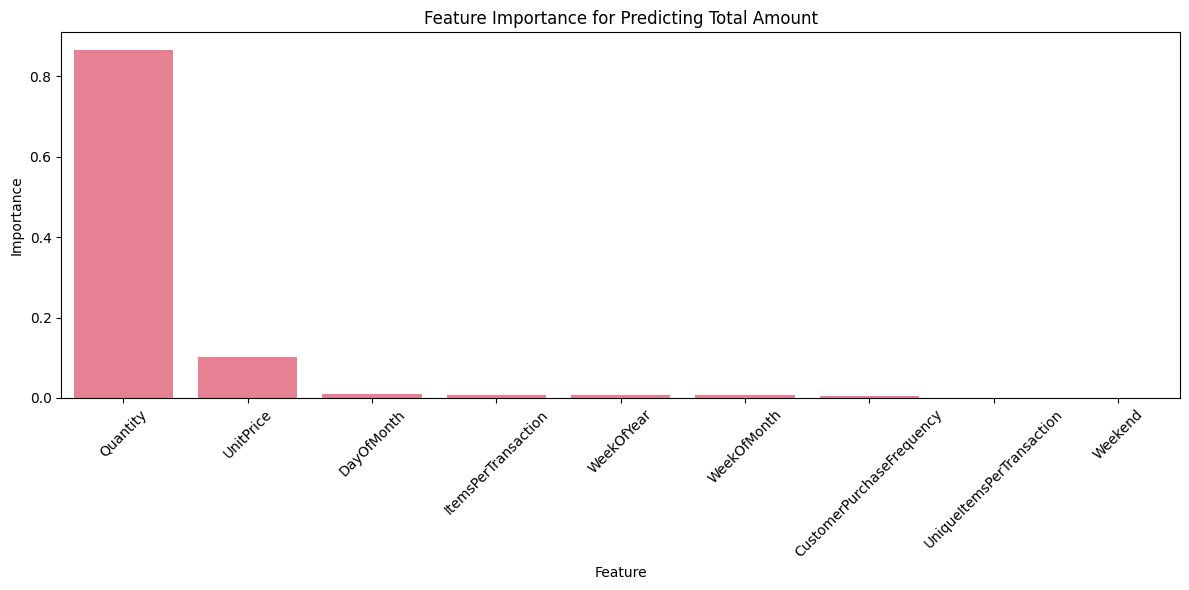

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Prepare features for importance analysis
numeric_features = ['Quantity', 'UnitPrice', 'Weekend', 'WeekOfYear', 'DayOfMonth', 
                    'WeekOfMonth', 'ItemsPerTransaction', 'UniqueItemsPerTransaction', 
                    'CustomerPurchaseFrequency']

X = df_cleaned[numeric_features]
y = df_cleaned['TotalAmount']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Feature', y='Importance')
plt.title('Feature Importance for Predicting Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 12. Customer Segmentation (RFM Analysis)

We'll perform RFM (Recency, Frequency, Monetary) analysis to segment customers:

Customer Segment Distribution:


Customer_Segment
Lost Cheap Customers    1261
Average Customers       1249
Loyal Customers          848
Lost Customers           533
Best Customers           447
Name: count, dtype: int64

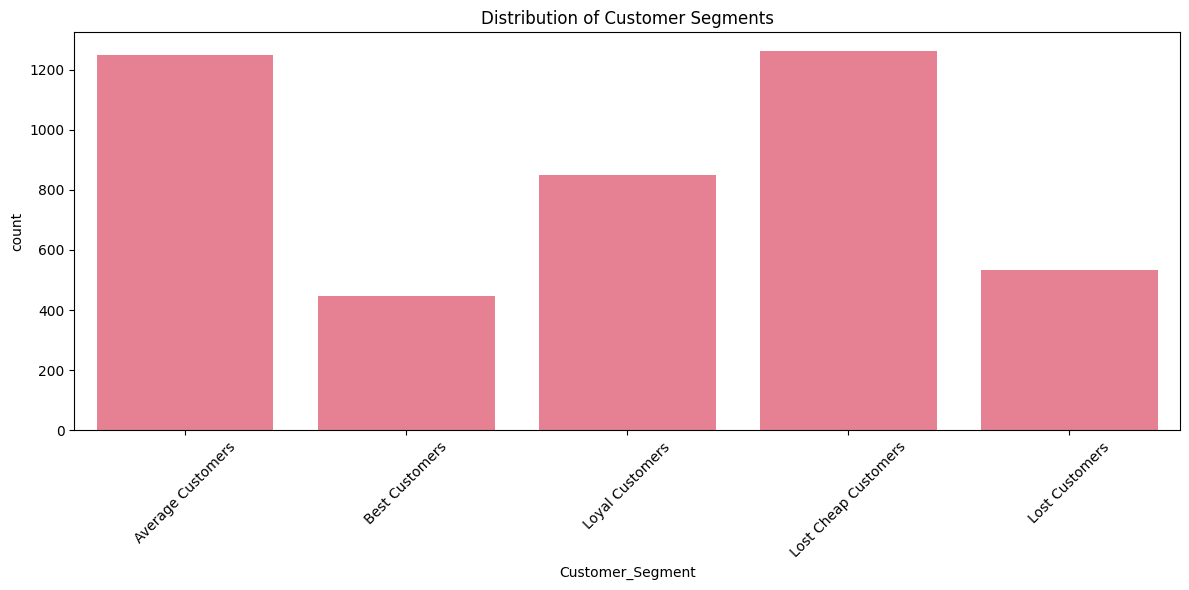

In [28]:
# Calculate RFM metrics
max_date = df_cleaned['InvoiceDate'].max()

rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
})

# Create RFM scores
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

rfm['R'] = r_quartiles
rfm['F'] = f_quartiles
rfm['M'] = m_quartiles

# Calculate RFM Score
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Create customer segments
def segment_customers(row):
    if row['R'] == 4 and row['F'] == 4 and row['M'] == 4:
        return 'Best Customers'
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        return 'Loyal Customers'
    elif row['R'] >= 3 and row['F'] <= 2 and row['M'] <= 2:
        return 'Lost Customers'
    elif row['R'] <= 2 and row['F'] <= 2 and row['M'] <= 2:
        return 'Lost Cheap Customers'
    else:
        return 'Average Customers'

rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

# Display segment distribution
segment_dist = rfm['Customer_Segment'].value_counts()
print('Customer Segment Distribution:')
display(segment_dist)

# Visualize segments
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm, x='Customer_Segment')
plt.title('Distribution of Customer Segments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 13. Basket Analysis

We'll perform market basket analysis to identify product associations:

/Users/thisanet/Library/Python/3.9/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Product Associations:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
537,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.015,0.012,0.011,0.748,61.896,1.000,0.011,3.923,0.998,0.692,0.745,0.825
536,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.012,0.015,0.011,0.902,61.896,1.000,0.011,10.033,0.996,0.692,0.900,0.825
905,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",0.014,0.014,0.010,0.738,53.852,1.000,0.010,3.766,0.995,0.581,0.734,0.735
900,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.014,0.014,0.010,0.732,53.852,1.000,0.010,3.685,0.995,0.581,0.729,0.735
530,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK ),0.014,0.015,0.011,0.769,52.370,1.000,0.011,4.259,0.995,0.617,0.765,0.763
531,(REGENCY MILK JUG PINK ),(REGENCY SUGAR BOWL GREEN),0.015,0.014,0.011,0.757,52.370,1.000,0.011,4.062,0.996,0.617,0.754,0.763
904,(POPPY'S PLAYHOUSE BEDROOM ),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",0.017,0.012,0.010,0.589,50.735,1.000,0.010,2.403,0.997,0.539,0.584,0.727
901,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE BEDROOM ),0.012,0.017,0.010,0.865,50.735,1.000,0.010,7.287,0.992,0.539,0.863,0.727
540,(REGENCY TEA PLATE ROSES ),(REGENCY TEA PLATE PINK),0.018,0.012,0.011,0.601,49.690,1.000,0.010,2.474,0.998,0.555,0.596,0.740
541,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES ),0.012,0.018,0.011,0.879,49.690,1.000,0.010,8.149,0.992,0.555,0.877,0.740


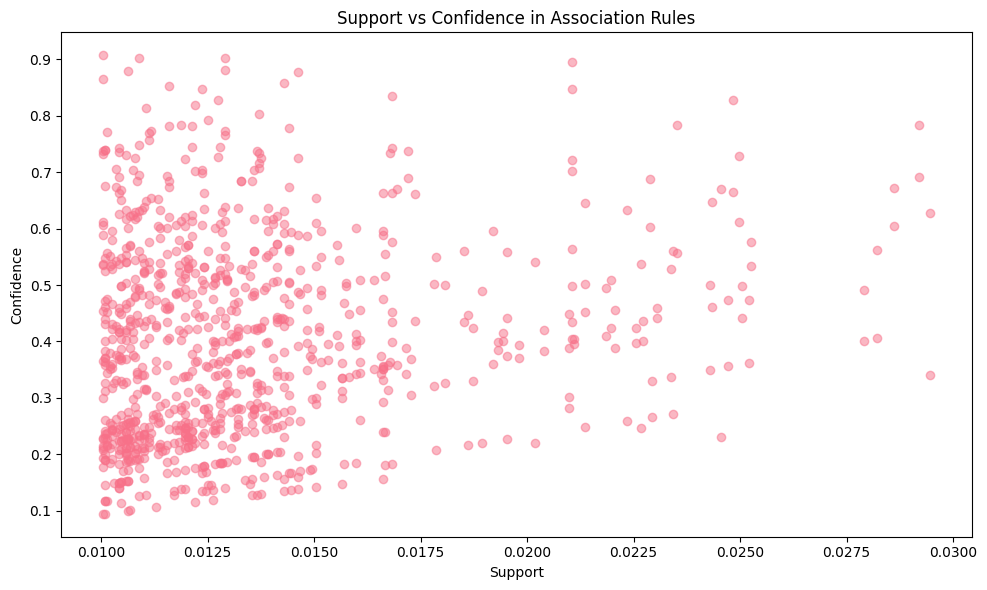

In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Create basket data
basket = df_cleaned.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket_sets = (basket > 0).astype(int)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules = rules.sort_values('lift', ascending=False)

print('Top 10 Product Associations:')
display(rules.head(10))

# Visualize support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence in Association Rules')
plt.tight_layout()
plt.show()

## 14. Seasonality Analysis

We'll analyze seasonal patterns in the data:

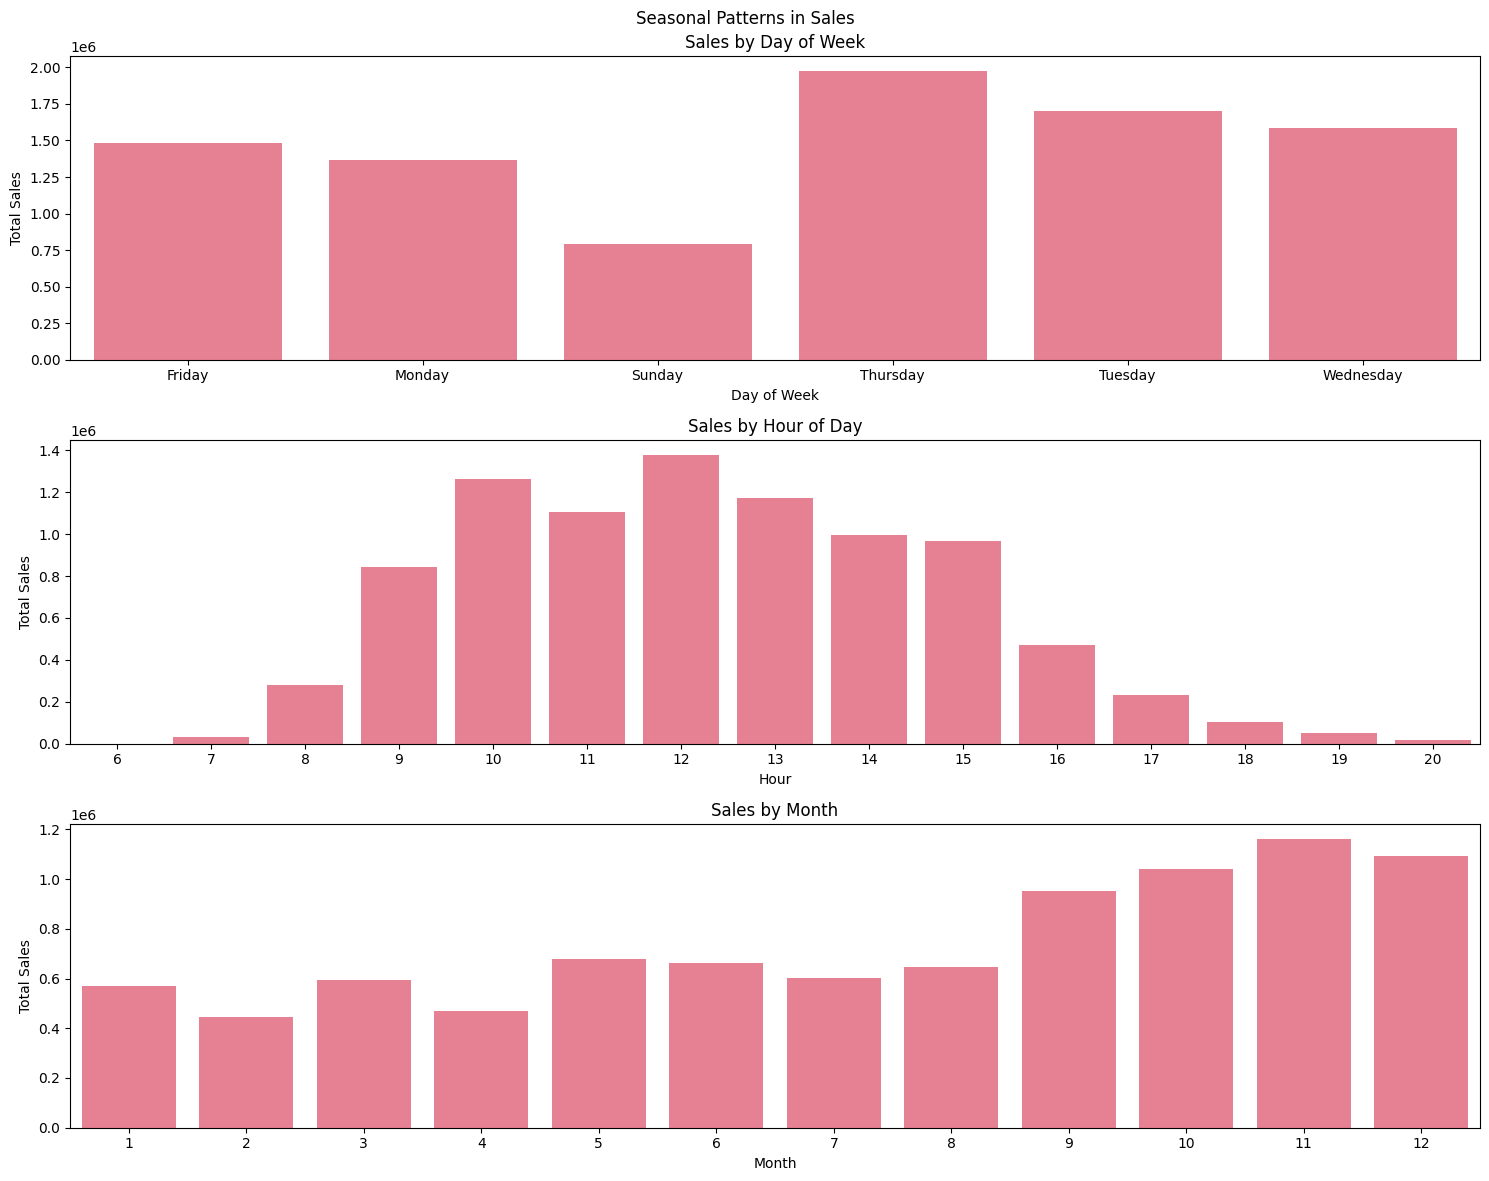

In [30]:
# Analyze daily patterns
daily_patterns = df_cleaned.groupby('WeekDay')['TotalAmount'].sum()
hourly_patterns = df_cleaned.groupby('Hour')['TotalAmount'].sum()
monthly_patterns = df_cleaned.groupby('Month')['TotalAmount'].sum()

# Create subplots for seasonal patterns
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Seasonal Patterns in Sales')

# Daily patterns
sns.barplot(x=daily_patterns.index, y=daily_patterns.values, ax=axes[0])
axes[0].set_title('Sales by Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Total Sales')

# Hourly patterns
sns.barplot(x=hourly_patterns.index, y=hourly_patterns.values, ax=axes[1])
axes[1].set_title('Sales by Hour of Day')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Total Sales')

# Monthly patterns
sns.barplot(x=monthly_patterns.index, y=monthly_patterns.values, ax=axes[2])
axes[2].set_title('Sales by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

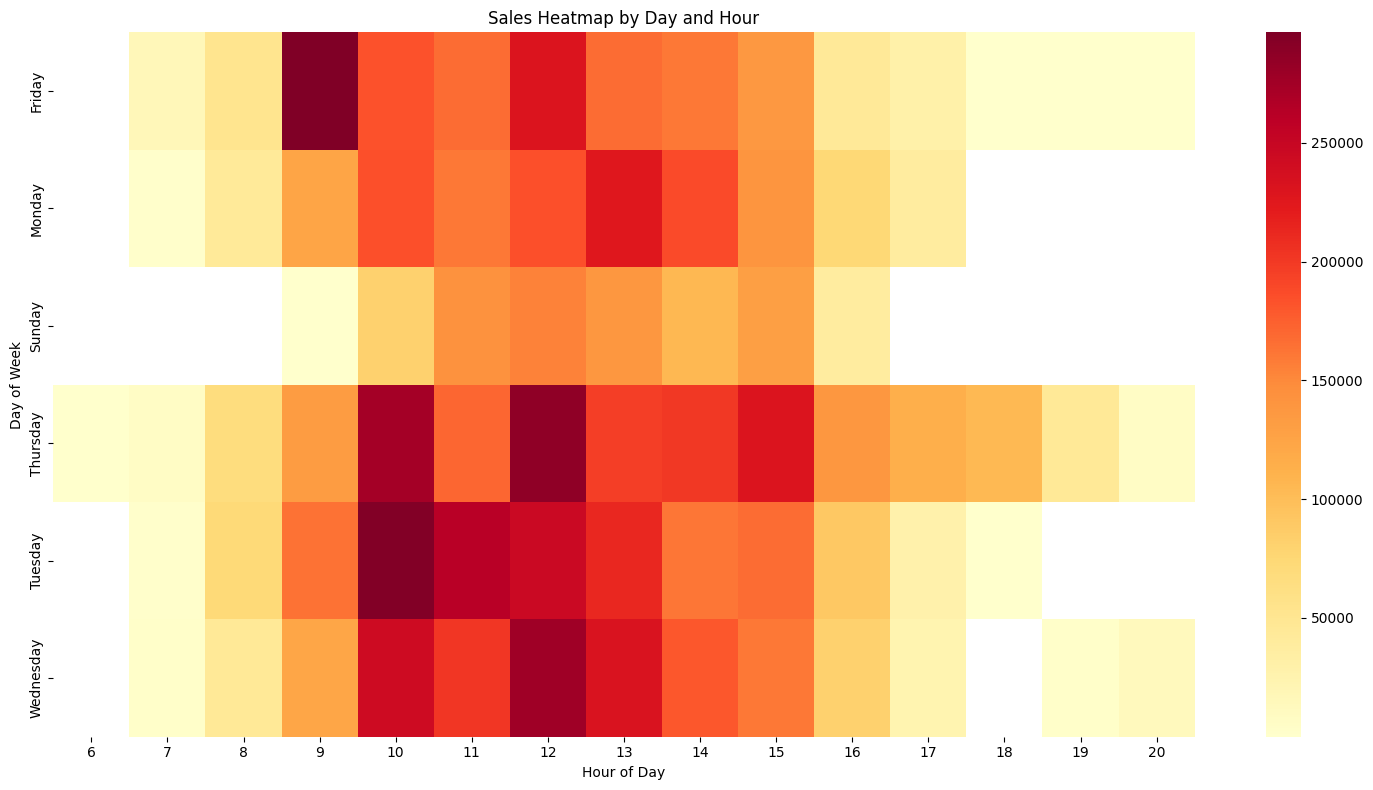

In [31]:
# Create heatmap of day-hour patterns
day_hour_patterns = df_cleaned.pivot_table(
    values='TotalAmount',
    index='WeekDay',
    columns='Hour',
    aggfunc='sum'
)

plt.figure(figsize=(15, 8))
sns.heatmap(day_hour_patterns, cmap='YlOrRd')
plt.title('Sales Heatmap by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

## 15. Save All Analysis Results

In [32]:
# Save all analysis results
df_cleaned.to_csv('../data/processed_retail_data.csv', index=False)
rfm.to_csv('../data/rfm_analysis.csv')
rules.to_csv('../data/association_rules.csv')
daily_sales.to_csv('../data/time_series_analysis.csv')
feature_importance.to_csv('../data/feature_importance.csv')

print('All analysis results have been saved successfully!')

All analysis results have been saved successfully!
